In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.1
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.1_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.1_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.4905

Best Fitness:	638.5992
Solution:	600.0000
Diff:		38.5992

[0:04:34][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.4117

Best Fitness:	636.6787
Solution:	600.0000
Diff:		36.6787

[0:08:26][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.7608

Best Fitness:	635.4176
Solution:	600.0000
Diff:		35.4176

[0:11:55][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.4110

Best Fitness:	636.2074
Solution:	600.0000
Diff:		36.2074

[0:15:10][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.3329

Best Fitness:	638.0093
Solution:	600.0000
Diff:		38.0093

[0:18:26][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.7499

Best Fitness:	635.4636
Solution:	600.0000
Diff:		35.4636

[0:21:47][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.2525

Best Fitness:	637.7124
Solution:	600.0000
Diff:		37.7124

[0:25:07][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.6821

Best Fitness:	636.3692
Solution:	600.0000
Diff:		36.3692

[0:28:31][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.8339

Best Fitness:	636.9559
Solution:	600.0000
Diff:		36.9559

[0:31:37][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.7083

Best Fitness:	637.8575
Solution:	600.0000
Diff:		37.8575

[0:34:55][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2287

Best Fitness:	637.3351
Solution:	600.0000
Diff:		37.3351

[0:38:03][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.3392

Best Fitness:	636.9857
Solution:	600.0000
Diff:		36.9857

[0:41:14][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.0178

Best Fitness:	639.3970
Solution:	600.0000
Diff:		39.3970

[0:44:18][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.3873

Best Fitness:	640.1086
Solution:	600.0000
Diff:		40.1086

[0:47:43][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2883

Best Fitness:	636.9894
Solution:	600.0000
Diff:		36.9894

[0:50:34][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.1002

Best Fitness:	637.7889
Solution:	600.0000
Diff:		37.7889

[0:54:00][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.7771

Best Fitness:	636.7308
Solution:	600.0000
Diff:		36.7308

[0:57:11][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.1555

Best Fitness:	634.5466
Solution:	600.0000
Diff:		34.5466

[1:00:15][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.2717

Best Fitness:	639.1005
Solution:	600.0000
Diff:		39.1005

[1:03:22][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.3344

Best Fitness:	638.3294
Solution:	600.0000
Diff:		38.3294

[1:06:41][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.3589

Best Fitness:	638.0594
Solution:	600.0000
Diff:		38.0594

[1:09:50][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.5707

Best Fitness:	636.3953
Solution:	600.0000
Diff:		36.3953

[1:13:07][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.4249

Best Fitness:	639.0346
Solution:	600.0000
Diff:		39.0346

[1:16:09][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.9417

Best Fitness:	639.6480
Solution:	600.0000
Diff:		39.6480

[1:19:31][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.8161

Best Fitness:	637.9340
Solution:	600.0000
Diff:		37.9340

[1:22:49][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	642.4208

Best Fitness:	636.1290
Solution:	600.0000
Diff:		36.1290

[1:25:52][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2134

Best Fitness:	637.5702
Solution:	600.0000
Diff:		37.5702

[1:28:54][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.0135

Best Fitness:	637.7821
Solution:	600.0000
Diff:		37.7821

[1:32:11][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.5043

Best Fitness:	638.3424
Solution:	600.0000
Diff:		38.3424

[1:35:21][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2001

Best Fitness:	632.2480
Solution:	600.0000
Diff:		32.2480

[1:38:51][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.1215

Best Fitness:	635.0473
Solution:	600.0000
Diff:		35.0473

[1:41:56][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.3192

Best Fitness:	637.2921
Solution:	600.0000
Diff:		37.2921

[1:45:09][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.7996

Best Fitness:	638.3959
Solution:	600.0000
Diff:		38.3959

[1:48:27][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	642.7882

Best Fitness:	636.7996
Solution:	600.0000
Diff:		36.7996

[1:51:36][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	642.2876

Best Fitness:	633.6431
Solution:	600.0000
Diff:		33.6431

[1:55:01][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	645.7215

Best Fitness:	639.8456
Solution:	600.0000
Diff:		39.8456

[1:58:15][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.1522

Best Fitness:	635.6391
Solution:	600.0000
Diff:		35.6391

[2:01:09][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.8040

Best Fitness:	637.7024
Solution:	600.0000
Diff:		37.7024

[2:04:23][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.8086

Best Fitness:	635.1283
Solution:	600.0000
Diff:		35.1283

[2:07:32][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	643.9383

Best Fitness:	638.4085
Solution:	600.0000
Diff:		38.4085

[2:10:56][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.1563

Best Fitness:	636.0459
Solution:	600.0000
Diff:		36.0459

[2:13:49][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	642.0563

Best Fitness:	633.6561
Solution:	600.0000
Diff:		33.6561

[2:17:05][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.1862

Best Fitness:	637.7173
Solution:	600.0000
Diff:		37.7173

[2:20:23][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.5820

Best Fitness:	637.4932
Solution:	600.0000
Diff:		37.4932

[2:23:31][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.6314

Best Fitness:	636.5176
Solution:	600.0000
Diff:		36.5176

[2:26:44][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.6948

Best Fitness:	637.3514
Solution:	600.0000
Diff:		37.3514

[2:29:51][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2154

Best Fitness:	638.1892
Solution:	600.0000
Diff:		38.1892

[2:33:06][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	641.4745

Best Fitness:	635.2634
Solution:	600.0000
Diff:		35.2634

[2:36:46][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.2358

Best Fitness:	637.6447
Solution:	600.0000
Diff:		37.6447

[2:40:03][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	644.6615

Best Fitness:	636.5576
Solution:	600.0000
Diff:		36.5576

[2:43:09][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	642.5046

Best Fitness:	635.0009
Solution:	600.0000
Diff:		35.0009

[2:46:12][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:46:12

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,42.244232,43.179185,42.84311,41.03467,43.634559,45.152027,43.692811,45.163745,43.878309,38.411432,...,41.494244,43.774941,43.360589,42.7559,45.284479,44.955242,43.796759,39.844711,42.23495,50
94,42.244232,43.179185,42.84311,41.03467,43.634559,42.822516,43.692811,45.163745,43.878309,38.411432,...,41.494244,43.774941,43.360589,42.7559,45.284479,44.955242,43.796759,39.844711,42.23495,50
95,42.244232,43.179185,42.84311,41.03467,43.634559,42.822516,43.692811,45.163745,43.878309,38.411432,...,41.494244,43.774941,43.360589,42.7559,45.284479,44.955242,43.796759,39.844711,42.23495,50
96,42.244232,43.179185,42.84311,41.03467,43.634559,42.822516,43.692811,45.163745,43.878309,38.411432,...,41.494244,43.774941,43.360589,42.7559,45.284479,44.955242,43.796759,39.844711,42.23495,50
97,42.244232,43.179185,42.84311,41.03467,43.634559,42.822516,43.692811,45.163745,43.878309,38.411432,...,41.494244,43.774941,43.360589,42.7559,45.284479,44.955242,43.796759,39.844711,42.23495,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 38.59921024235598

Best error for run 1: 36.6787425657152

Best error for run 2: 35.41763404029189

Best error for run 3: 36.20735553894633

Best error for run 4: 38.00925215115353

Best error for run 5: 35.46362574386819

Best error for run 6: 37.712437325069345

Best error for run 7: 36.36924107137145

Best error for run 8: 36.95592822339938

Best error for run 9: 37.85747227411525

Best error for run 10: 37.33505037582984

Best error for run 11: 36.98567279656095

Best error for run 12: 39.39695807431099

Best error for run 13: 40.10864707941619

Best error for run 14: 36.9893876833562

Best error for run 15: 37.78886062144136

Best error for run 16: 36.73078619161856

Best error for run 17: 34.54664128250943

Best error for run 18: 39.10054057617276

Best error for run 19: 38.32941769718616

Best error for run 20: 38.05941218035025

Best error for run 21: 36.395326982283905

Best error for run 22: 39.03455214626797

Best error for run 23: 39.64801622840707

Best error for run 24: 37.93402153227328

Best error for run 25: 36.12895810260886

Best error for run 26: 37.57022739539423

Best error for run 27: 37.782070366091716

Best error for run 28: 38.34243985025296

Best error for run 29: 32.24799676655164

Best error for run 30: 35.04732345908519

Best error for run 31: 37.29205319007394

Best error for run 32: 38.395886515104735

Best error for run 33: 36.799565489172096

Best error for run 34: 33.64307918974191

Best error for run 35: 39.845569994213065

Best error for run 36: 35.63909938319489

Best error for run 37: 37.70241131562318

Best error for run 38: 35.12830502617521

Best error for run 39: 38.40848413241952

Best error for run 40: 36.04591507799887

Best error for run 41: 33.65611007644725

Best error for run 42: 37.7173126473275

Best error for run 43: 37.49320249995253

Best error for run 44: 36.51759872681896

Best error for run 45: 37.351447973011545

Best error for run 46: 38.18922920740442

Best error for run 47: 35.26341734785842

Best error for run 48: 37.64466649292649

Best error for run 49: 36.55756810987657

Best error for run 50: 35.00091377755086

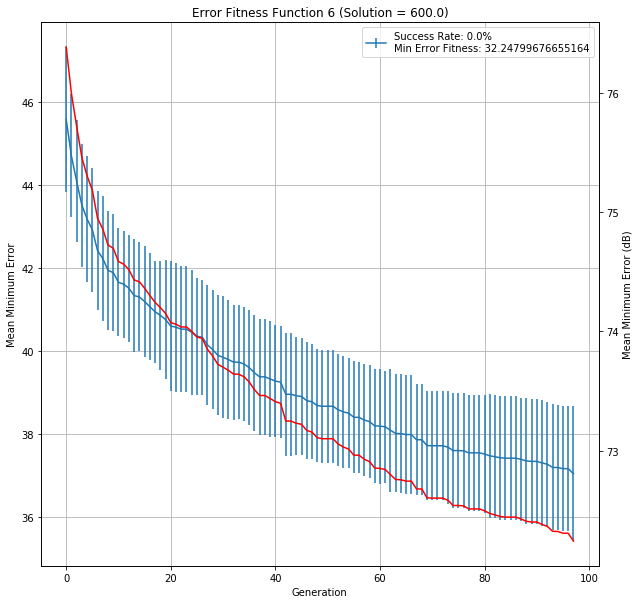

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.1_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.1,38.59921,36.678743,35.417634,36.207356,38.009252,35.463626,...,36.517599,37.351448,38.189229,35.263417,37.644666,36.557568,35.000914,37.040491,2:46:12,30000
